In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
import os
afile = "networkSim1"
# Load only CSVs containing 'networkSim1' in their name
csv_files = glob.glob(f"*{afile}*.csv")
for files in csv_files:
    print(files)
# Extract label from filename for each file
def extract_label(filename):
    base = os.path.basename(filename)
    label = base.replace("_benchmark.csv", "").replace("client_", "").replace("networkSim1_", "")
    return label.replace("_", " ").upper()  # Optional: format label nicely

combined_df = pd.DataFrame()

for file in csv_files:
    label = extract_label(file)
    df = pd.read_csv(file)

    df["timestamp"] = pd.to_datetime(df["timestamp"], format="%H:%M:%S")
    start_time = df["timestamp"].iloc[0]
    df["elapsed_seconds"] = (df["timestamp"] - start_time).dt.total_seconds()
    df["elapsed_minutes"] = df["elapsed_seconds"] / 60

    df["wall_time_total_seconds"] = df["wall_time_seconds"].apply(
        lambda x: sum(float(t) * 60 ** i for i, t in enumerate(reversed(str(x).split(":"))))
    )

    df["algorithm"] = label
    combined_df = pd.concat([combined_df, df], ignore_index=True)



client_networkSim1_client_bikel5_benchmark.csv
client_networkSim1_client_bikel1_benchmark.csv
client_networkSim1_client_hqc256_benchmark.csv
client_networkSim1_client_kyber512_benchmark.csv
client_networkSim1_client_hqc128_benchmark.csv
client_networkSim1_client_hqc192_benchmark.csv
client_networkSim1_client_kyber1024_benchmark.csv
client_networkSim1_client_kyber768_benchmark.csv
client_networkSim1_client_bikel3_benchmark.csv


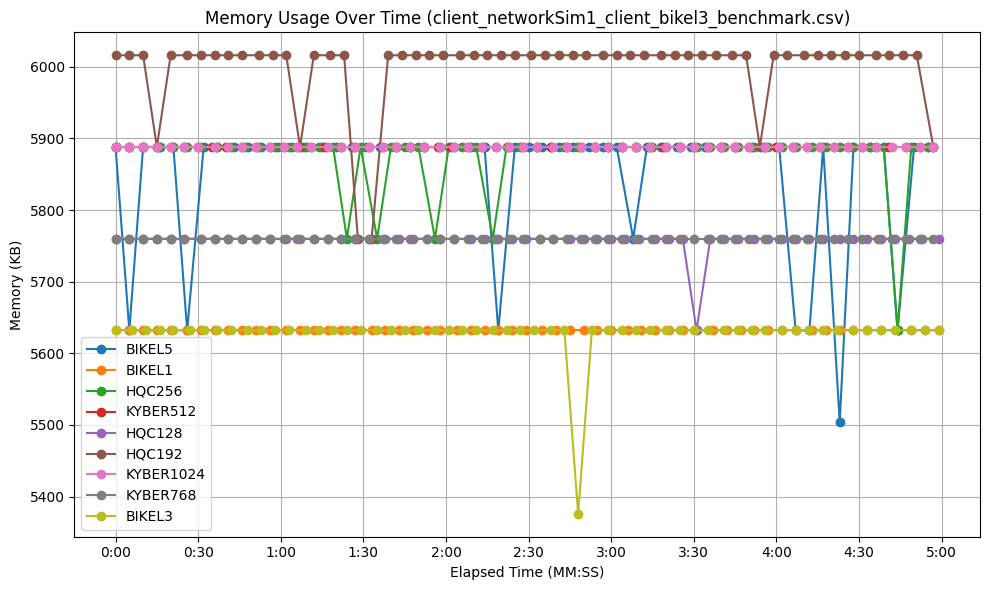

In [ ]:
plt.figure(figsize=(10, 6))
for label in combined_df["algorithm"].unique():
    subset = combined_df[combined_df["algorithm"] == label]
    plt.plot(subset["elapsed_minutes"], subset["memory_kb"], marker='o', label=label)

plt.title(f"Memory Usage Over Time ({afile})")
plt.xlabel("Elapsed Time (MM:SS)")
plt.ylabel("Memory (KB)")
plt.legend()
plt.grid(True)
plt.xticks(tick_values)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_minutes_to_mmss))
plt.tight_layout()
plt.savefig(f"graphs/memory_usage_overtime_{afile}.png", dpi=300)
plt.show()


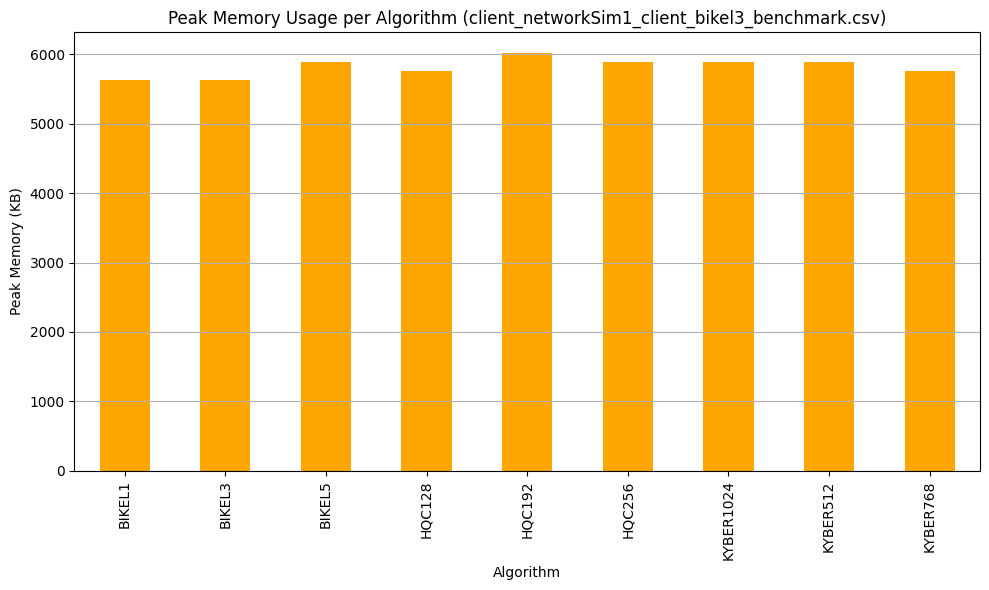

In [13]:
plt.figure(figsize=(10, 6))
peak_memory = combined_df.groupby("algorithm")["memory_kb"].max()
peak_memory.plot(kind="bar", color="orange")

plt.title(f"Peak Memory Usage per Algorithm ({file})")
plt.xlabel("Algorithm")
plt.ylabel("Peak Memory (KB)")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig(f"graphs/Peak_memory_Usage_{file}.png", dpi=300)
plt.show()


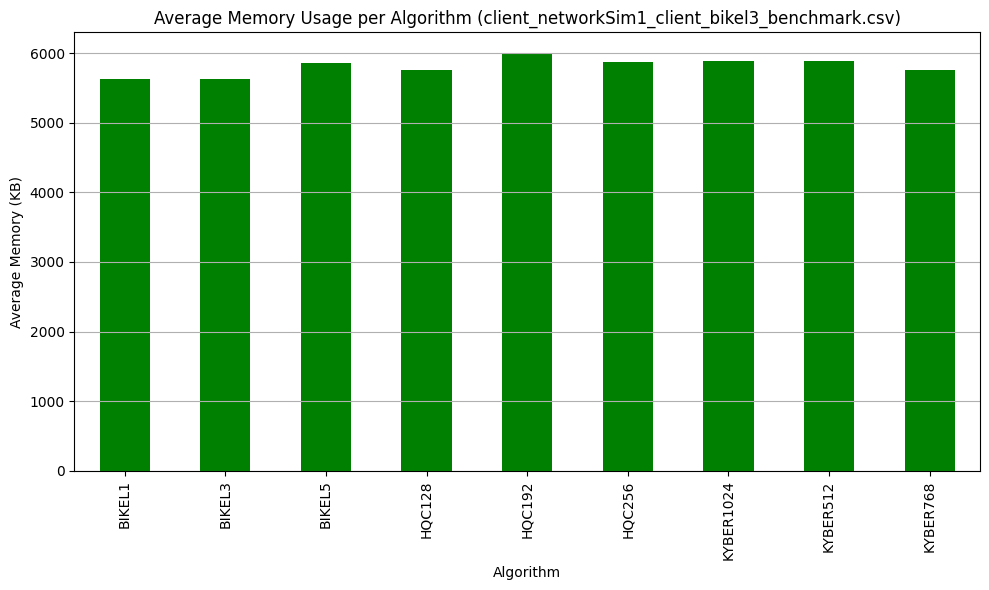

In [14]:
plt.figure(figsize=(10, 6))
avg_memory = combined_df.groupby("algorithm")["memory_kb"].mean()
avg_memory.plot(kind="bar", color="green")

plt.title(f"Average Memory Usage per Algorithm ({file})")
plt.xlabel("Algorithm")
plt.ylabel("Average Memory (KB)")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig(f"graphs/Average_Memory_Usage{file}.png", dpi=300)
plt.show()
